#### Notebook for debugging 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from tqdm import tqdm
import os
import sys

sys.path.append(os.path.abspath('../ANN-code'))

from image_preprocessing import noise_adder, gaussian_smoothing
from data_methods import create_file_paths
from bb_event import Event

from feature_extraction import extract_sum_intensity, extract_max_intensity
from feature_extraction import extract_axis, extract_recoil_angle
from feature_extraction import extract_intensity_profile
from feature_extraction import extract_length

# feature extraction parameters
smoothing_sigma = 3.5
length_percentile = 40
local = True
name = "im0"
start_num = 0

# image directories
if local:
    base_dirs = ["../ANN-code/Data/im0/C",
                  "../ANN-code/Data/im0/F"
                  ]
else:
    base_dirs = [
        "/vols/lz/tmarley/GEM_ITO/run/im0/C",
        "/vols/lz/tmarley/GEM_ITO/run/im0/F",
        "/vols/lz/tmarley/GEM_ITO/run/im1/C",
        "/vols/lz/tmarley/GEM_ITO/run/im1/F",
        "/vols/lz/tmarley/GEM_ITO/run/im2/C",
        "/vols/lz/tmarley/GEM_ITO/run/im2/F",
        "/vols/lz/tmarley/GEM_ITO/run/im3/C",
        "/vols/lz/tmarley/GEM_ITO/run/im3/F",
        "/vols/lz/tmarley/GEM_ITO/run/im4/C",
        "/vols/lz/tmarley/GEM_ITO/run/im4/F"
    ]


events = []
dir_number = start_num
base_dirs = base_dirs[start_num:start_num+2]


if local:
    dark_dir = "../ANN-code/Data/darks"
else:
    dark_dir = "/vols/lz/MIGDAL/sim_ims/darks"


# create list of image paths from a base directory
image_paths = create_file_paths(base_dirs)

# test sample
image_paths = image_paths[:1000]

num_ims = len(image_paths)

# removing known bad images if they are in the list
if not local:
    uncropped_error = np.loadtxt("uncropped_error.csv", delimiter=",", dtype=str)
    min_dim_error = np.loadtxt("min_dim_error.csv", delimiter=",", dtype=str)
    errors = np.concatenate((uncropped_error, min_dim_error))
    image_paths = [path for path in image_paths if path not in errors]

    print(f"Removed {num_ims - len(image_paths)} known bad images")
    num_ims = len(image_paths)

# event instantiation and preprocessing
dark_list_number = 0
m_dark = np.load(f"{dark_dir}/master_dark_1x1.npy")
example_dark_list = np.load(f"{dark_dir}/quest_std_dark_{dark_list_number}.npy")


for path in tqdm(image_paths):
    # preprocessing images (add noise and smooth)
    im = np.load(path)
    im = noise_adder(im, m_dark, example_dark_list)
    im = gaussian_smoothing(im, smoothing_sigma=smoothing_sigma)

    events.append(Event(path, im))


print("---------------------------------")
print("Preprocessing complete")
print("---------------------------------")

100%|██████████| 1000/1000 [00:02<00:00, 379.13it/s]

---------------------------------
Preprocessing complete
---------------------------------


1000


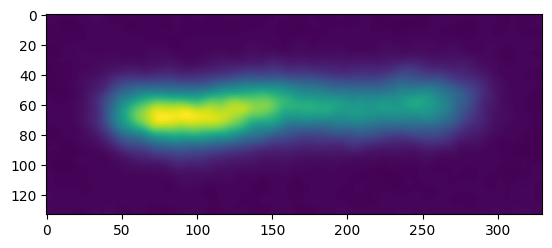

In [ ]:
# test length extraction

